<a href="https://colab.research.google.com/github/sraymundo15/sraymundo15/blob/master/Sebastian_Raymundo_CHM343_Physical_Chemistry_Lab_1_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ASU CHM 343 Physical Chemistry Lab '1' - Notebook**
##*Determination of Speed of Sound and Heat Capacity Ratios of Gases by Using Acoustic Interferometry*

September 9, 2025

**Sebastian Raymundo**, sraymun1@asu.edu

# **Abstract**

Short summary of the lab notebook (report) content. State the objectives, methods used, main results and conlusions.

# **Set up Notebook Environment**

The neccessary modules/libraries you need to execute the code cells in this notebook.   For google colaboratory and/or jupyter notebooks, this is commonly python libraries (e.g., numpy, pandas, matplotlib, scipy).

[![Open In Colab](https://raw.githubusercontent.com/CHM343/Images/main/colab-badge.svg)](https://colab.research.google.com/github/CHM343/Labs/blob/main/ASU_CHM343_Physical_Chemistry_Lab_Colab_Notebook_Template_2024.ipynb)

In [23]:
# Example code cell with common python libraries

# Python Libraries for display in Colab/Jupyter (Ipython)
from IPython import display
from IPython.display import Image

# Primary Python Libraries
import math
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy import stats
from scipy.stats import t
import matplotlib.pyplot as plt

# Additional Matplotlib components to make custom plots
from matplotlib.offsetbox import AnnotationBbox
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.lines as lines
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# **Introduction**

Give a short description of the problem investigated in this lab notebook (report), and provide some background information so that the reader can understand the context.

Briefly describe what method you have chosen to solve the problem, and justify why you selected that method.

Here you can express mathematics through Latex syntax, and use hyperlinks for references.

For example:

[Hyperlink to CHM343 GitHub Site and Repositories](https://github.com/CHM343)

$\LaTeX$ formatted equations:

\begin{equation*}
dU = TdS - pdV +  \sum_{i=1}^n \mu_i d n_i  
\end{equation*}

\begin{equation*}
 \mu_i \equiv \left( \frac{\partial U}{\partial n_i}  \right) _{S,V,n _{i \neq j}}
\end{equation*}

(all of chemical thermodynamics wrapped up in two equations)


Embed images:

<img src="https://github.com/CHM343/Images/blob/e1f1361e585f1de8c296cea40ed0f0e36d62c300/ASU_CHM343_Pchem_Lab_2in_1in_Fall2024.jpg?raw=true" width="250" alt="Pchem Logo Image" />


# **Methods**

Describe the experimental, computational and data/error analysis methods you used for this laboratory/project. This may be a combination of text, mathematical formulas (Latex), algorithms (code), data and output.  

# **Results & Discussion**

Present the results. If the result is an algorithm that you have described under the *Methods* section, you can present the data from verification and performance tests in this section. If the result is the output from a computational experiment or (remote) laboratory experiment, this is where you present the data and associated analysis.

Summarize your results and your conclusions. Were the results expected or surprising. Do your results have implications outside the particular problem investigated in this laboratory exercise?

In [24]:
# Read-in Audacity exported spectral data (and first line header label) from public sraymundo15 GitHub Repository using pandas.
# White Noise Spectrum
White_Noise_Spectrum = pd.read_table('https://raw.githubusercontent.com/sraymundo15/sraymundo15/refs/heads/master/01_07%20White%20Noise%20Spectrum.txt', sep = "\t" ,header=0)
# Air White Noise Spectrum
Air_Spectrum = pd.read_table('https://raw.githubusercontent.com/sraymundo15/sraymundo15/refs/heads/master/01_04%20Air%20Spectrum.txt', sep = "\t" ,header=0)
# Nitrogen White Noise Spectrum
Nitrogen_Spectrum = pd.read_table('https://raw.githubusercontent.com/sraymundo15/sraymundo15/refs/heads/master/01_05%20Nitrogen%20Spectrum.txt', sep = "\t" ,header=0)
# Natural Gas White Noise Spectrum
NaturalGas_Spectrum = pd.read_table('https://raw.githubusercontent.com/sraymundo15/sraymundo15/refs/heads/master/01_06%20Natural%20Gas%20Spectrum.txt', sep = "\t" ,header=0)

Visualize plot of Spectral Data (for White Noise sound)

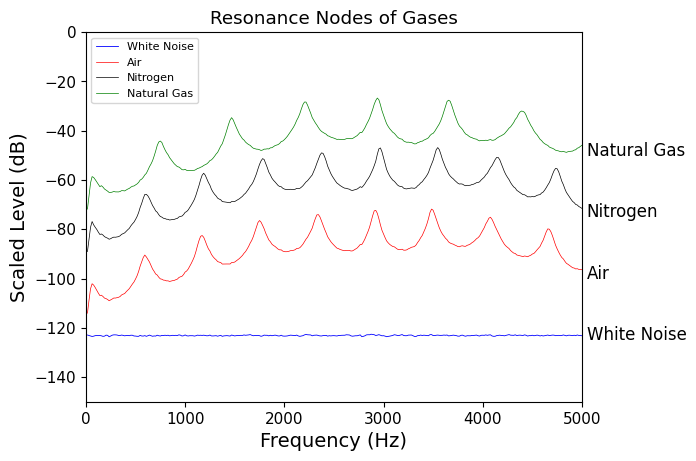

In [27]:
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '11'

ax.plot(White_Noise_Spectrum['Frequency (Hz)'], White_Noise_Spectrum['Level (dB)']-90, linewidth=0.6, color = 'blue', label = 'White Noise')
ax.plot(Air_Spectrum['Frequency (Hz)'], Air_Spectrum['Level (dB)']-45, linewidth=0.5, color = 'red', label = 'Air')
ax.plot(Nitrogen_Spectrum['Frequency (Hz)'], Nitrogen_Spectrum['Level (dB)']-20, linewidth=0.5, color = 'black', label = 'Nitrogen')
ax.plot(NaturalGas_Spectrum['Frequency (Hz)'], NaturalGas_Spectrum['Level (dB)'], linewidth=0.5, color = 'green', label = 'Natural Gas')


# Plot x and y axis min/max limits for plot
plt.xlim(0, 5000)
plt.ylim(-150, 0)

plt.title("Resonance Nodes of Gases")
plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("Scaled Level (dB)", fontsize=14)

# plot legend and axes
ax.legend(loc = 'upper left', fontsize=8)
ax.get_yaxis().set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Annotate Plot with text
ax.text(5050, -50, 'Natural Gas', fontsize=12)
ax.text(5050, -75, 'Nitrogen', fontsize=12)
ax.text(5050, -100, 'Air', fontsize=12)
ax.text(5050, -125, 'White Noise', fontsize=12)

# Display the Plot
plt.show()

Use the Python SciPy Library to Find Peaks in the Spectral Data

In [30]:
# python code using SciPy library for extracting resonance 'peak' locations in acoustic interferometry white noise spectral data

gas1_peaks = find_peaks(Air_Spectrum['Level (dB)'], rel_height=100, distance = 200, prominence = 10)
gas2_peaks = find_peaks(Nitrogen_Spectrum['Level (dB)'], rel_height=100, distance = 200, prominence = 10)
gas3_peaks = find_peaks(NaturalGas_Spectrum['Level (dB)'], rel_height=100, distance = 200, prominence = 10)

Gas1_Frequency = Air_Spectrum['Frequency (Hz)']
Gas2_Frequency = Nitrogen_Spectrum['Frequency (Hz)']
Gas3_Frequency = NaturalGas_Spectrum['Frequency (Hz)']

gas1_peak_list = Gas1_Frequency[gas1_peaks[0]]
gas2_peak_list = Gas2_Frequency[gas2_peaks[0]]
gas3_peak_list = Gas3_Frequency[gas3_peaks[0]]

gas1_peak_array = np.array((round(gas1_peak_list,2)))
gas2_peak_array = np.array((round(gas2_peak_list,2)))
gas3_peak_array = np.array((round(gas3_peak_list,2)))

gas1_peaktable = pd.DataFrame(gas1_peak_array, columns=["Frequency (Hz)"])
gas2_peaktable = pd.DataFrame(gas2_peak_array, columns=["Frequency (Hz)"])
gas3_peaktable = pd.DataFrame(gas3_peak_array, columns=["Frequency (Hz)"])

gas1_peaktable['Node'] = np.arange(1, gas1_peaktable.shape[0] + 1)
gas2_peaktable['Node'] = np.arange(1, gas2_peaktable.shape[0] + 1)
gas3_peaktable['Node'] = np.arange(1, gas3_peaktable.shape[0] + 1)

gas1_peaktable = gas1_peaktable.loc[:,['Node','Frequency (Hz)']]
gas2_peaktable = gas2_peaktable.loc[:,['Node','Frequency (Hz)']]
gas3_peaktable = gas3_peaktable.loc[:,['Node','Frequency (Hz)']]

#print('Peak location Frequency (Hz)')
#print('')
#print(round(gas1_peak_list,2))

Plot the combined Spectral Data and calculated peaks drom SciPy

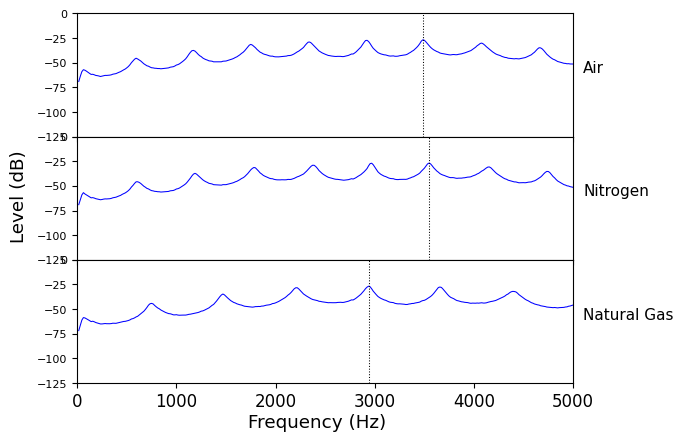

In [33]:
# Initializes a matplotlib subplot (plot all 4 gases and find_peak frequencies)
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

#Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

axs[0].plot(Air_Spectrum['Frequency (Hz)'], Air_Spectrum['Level (dB)'], 'b-', label = 'Air')
axs[1].plot(Nitrogen_Spectrum['Frequency (Hz)'], Nitrogen_Spectrum['Level (dB)'], 'b-', label = 'Nitrogen')
axs[2].plot(NaturalGas_Spectrum['Frequency (Hz)'], NaturalGas_Spectrum['Level (dB)'], 'b-', label = 'Natural Gas')

#set the plotting axis limits and x- and y-axis labels
plt.axis([0,5000,-125,0])
#plt.xlabel('Frequency (Hz)')
#set_shared_ylabel(axs, 'Level (dB)')
#plt.ylabel('Level (dB)')
fig.supxlabel('Frequency (Hz)')
fig.supylabel('Level (dB)')

#For Loop to add the peak_list determined using SciPy find_peaks and add as verticle dotted lines to the spectrum plot
for y in range(len(gas1_peaks[0])):
  axs[0].axvline(x = gas1_peak_list.iloc[y], color='k',linestyle='dotted')
for y in range(len(gas2_peaks[0])):
  axs[1].axvline(x = gas2_peak_list.iloc[y], color='k',linestyle='dotted')
for y in range(len(gas3_peaks[0])):
  axs[2].axvline(x = gas3_peak_list.iloc[y], color='k',linestyle='dotted')

#Annotate Plot with text
axs[0].text(5100, -60, 'Air', fontsize=11)
axs[1].text(5100, -60, 'Nitrogen', fontsize=11)
axs[2].text(5100, -60, 'Natural Gas', fontsize=11)

#Changing the Font Size Using rcParams
plt.rc('axes', labelsize=12)        # Controls Axes Labels
plt.rc('xtick', labelsize=12)       # Controls x Tick Labels
plt.rc('ytick', labelsize=8)       # Controls y Tick Labels
plt.rcParams['lines.linewidth'] = 0.75   # Controls linewidth for all Plots

#Show the plot in this notebook
plt.show()

Fit and Plot the Combined Gas Resonance Frequency Data

/tmp/ipython-input-3580840548.py:23: RankWarning: Polyfit may be poorly conditioned
  b1, a1 = np.polyfit(gas1_peaktable['Node'], gas1_peaktable['Frequency (Hz)'], deg=1)
/tmp/ipython-input-3580840548.py:24: RankWarning: Polyfit may be poorly conditioned
  b2, a2 = np.polyfit(gas2_peaktable['Node'], gas2_peaktable['Frequency (Hz)'], deg=1)


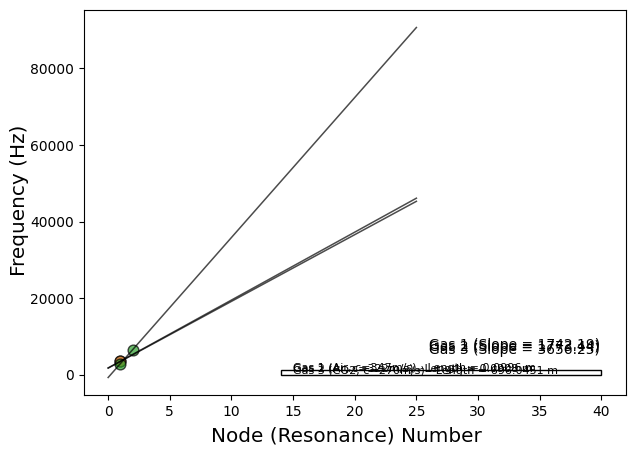

In [34]:
# Initialize plot layout
fig, ax = plt.subplots(figsize = (7, 5))

# Set general font size
plt.rcParams['font.size'] = '12'

# Set X and Y Axis Labels for subPlots
fig.supxlabel('Node (Resonance) Number')
fig.supylabel('Frequency (Hz)')

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(10)

# Add scatter plots
ax.scatter(gas1_peaktable['Node'], gas1_peaktable['Frequency (Hz)'], s=60, alpha=0.7, edgecolors="k")
ax.scatter(gas2_peaktable['Node'], gas2_peaktable['Frequency (Hz)'], s=60, alpha=0.7, edgecolors="k")
ax.scatter(gas3_peaktable['Node'], gas3_peaktable['Frequency (Hz)'], s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b1, a1 = np.polyfit(gas1_peaktable['Node'], gas1_peaktable['Frequency (Hz)'], deg=1)
b2, a2 = np.polyfit(gas2_peaktable['Node'], gas2_peaktable['Frequency (Hz)'], deg=1)
b3, a3 = np.polyfit(gas3_peaktable['Node'], gas3_peaktable['Frequency (Hz)'], deg=1)

# Speed of Sound for Gases 1 (air) and 2 (Nitrogen) in m/s.
c1 = 347
c2 = 322

# Determine the Acoustic Interferometer resonance tube length (L) for Gases 1 (air) and 2 (Nitrogen) in m/s.
l1 = c1/(2*b1)
l2 = c2/(2*b2)

# Determine the Speed of Sound (c) for Gas 3 (Natural Gas) in m/s.
c3 = ((l1+l2)/2)*(2*b3)

# Create sequence of 10 numbers from 298 to 365
xseq = np.linspace(0, 25, num=26)

# Plot regression line
ax.plot(xseq, a1 + b1 * xseq, alpha=0.7, color="k", lw=1.1)
ax.plot(xseq, a2 + b2 * xseq, alpha=0.7, color="k", lw=1.1)
ax.plot(xseq, a3 + b3 * xseq, alpha=0.7, color="k", lw=1.1)

#Annotate Plot with text
ax.text(26, 6800, 'Gas 1 (Slope = {})'.format(round(b1,2)), fontsize=10)
ax.text(26, 6200, 'Gas 2 (Slope = {})'.format(round(b2,2)), fontsize=10)
ax.text(26, 5300, 'Gas 3 (Slope = {})'.format(round(b3,2)), fontsize=10)

ax.text(15, 900, 'Gas 1 (Air, c=347m/s) - Length = {} m'.format(round(l1,4)), fontsize=8)
ax.text(15, 600, 'Gas 2 (Nitrogen, c=322m/s) - Length = {} m'.format(round(l2,4)), fontsize=8)
ax.text(15, 300, 'Gas 3 (Natural Gas, c=270m/s) - Length = {} m'.format(round(c3,4)), fontsize=8)

# Create a Rectangle patch
rect = patches.Rectangle((14, -100), 26, 1300, linewidth=1, edgecolor='k', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

#Show the plot in this notebook
plt.show()

# **References**



1.   ACS style formatted reference (cited in the sections above), with hyperlinks.
2.
Bravenec, A.D., Ward, K.D., Interactive Python Notebooks for Physical Chemistry, 	*Journal of Chemical Education* (2022) 100, 933–940. ([10.1021/acs.jchemed.2c00665](https://pubs-acs-org.ezproxy1.lib.asu.edu/doi/10.1021/acs.jchemed.2c00665))



# **Supplemental Information**

Detailed calcuations, error analysis, additional data, etc.